# ANN for Regression
This document will cover:
- What a regression is
- How to construct and ANN model for simple regression

### What is a "Simple Regression"?
Simple Regression mean to predict one continuous variable from another

$\hat{y}_i=\beta_0+\beta_1x_i+\epsilon_i$

In [10]:
import numpy as  np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

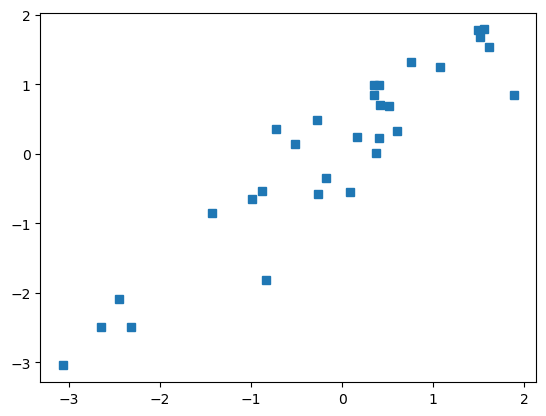

In [11]:
# create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [12]:
# build model
ANN = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(),      # activation function
    nn.Linear(1,1)  # output layer
)

In [13]:
# Learning Rate
lr = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (The flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANN.parameters(),lr=lr)

In [14]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

## Train the model!
for epochi in range(numepochs):

    # forward pass
    yHat = ANN(x)

    # compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

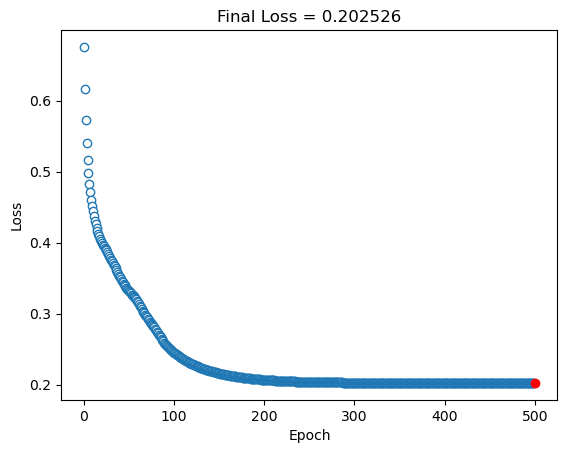

In [15]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANN(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final Loss = %g' %testloss.item())
plt.show()

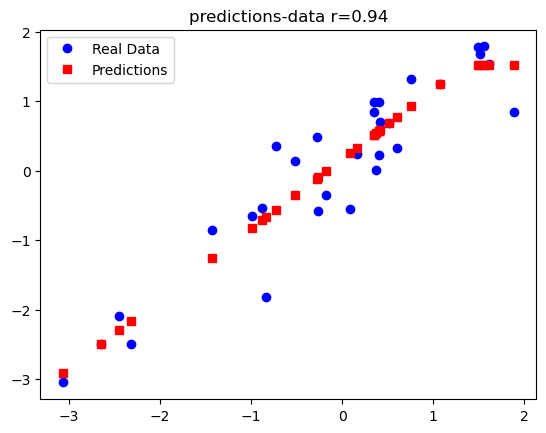

In [16]:
# plot the data
plt.plot(x,y,'bo',label='Real Data')
plt.plot(x,predictions.detach(), 'rs', label='Predictions')
plt.title(f'predictions-data r={np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()